# Perceptron

Perceptron's algorithm is the ancestor of neural networks  est l'ancêtre des réseaux de neurones. It's a parametric algorithm that tries to find a linear separation in attributes space between classes (if there is such separation) :

$f_{\theta}(\mathbf{x}) = sign(\sum_{i=1}^{d} w_i x_i + b)$

Function $sign$ is defined as :
- $ sign : \mathbb{R} \rightarrow \{-1;+1\}$ 
- $ x \rightarrow \{+1\} \text{ if } x \geq 0$
- $ x \rightarrow \{-1\} \text{ if } x \lt 0$

## Application

A bank would like to find if it's worth lending money to a person. It's a binary classification problem and we arbitrarly set the following statement :
- granting the loan : class $\{+1\}$.
- denying the loan : class $\{-1\}$.

A client's attributes would be his average overdraft, his average savings balance, his age, his salaray, etc. The client's attributs are within a vector $\mathbf{x}$. By combining these attributes, we get a score $s = \sum_{i=1}^{d} w_i x_i$. If the score $s$ is above a threshold ($-b$), then we have $f_{\theta}(\mathbf{x}) = +1$ and the loan is granted (denied otherwise).


Let's introduce vector $\theta$ with a dimension $d + 1$ which gather the model parameters :

$$\theta = (w_1, w_2, ..., w_d, b)$$

Let's also introduce vector $\mathbf{x}^{+}$ corresponding to concatenation of $\mathbf{x}$ and $1$ :

$$\mathbf{x}^{+} = (x_1, x_2, ..., x_d, 1)$$

Thus, we notice that using the dot product, we obtain a simplified writing for the prediction function :

$$f_{\theta}(\mathbf{x}) = sign(\theta^{T} \cdot \mathbf{x}^{+})$$

Predicted class for example $x$ is then :
- $+1$ if the angle of vectors $\mathbf{x}^{+}$ et $\theta$ is **acute**.
- $-1$ if the angle of vectors $\mathbf{x}^{+}$ et $\theta$ is **obtuse**.

Let's admit that there is an exemple $\mathbf{x}^{(i)} \in D_{app}$ which is wrongly classified by $f_{\theta}$, it's necessary to update this function with the following rule: 

$$ \theta \leftarrow \theta + c_i \times \mathbf{x}^{(i)+}$$

Then, we can show that by using any wrongly classified example and by repeating this update rule, we converge to a vector $\theta$ allowing us to classify correctly every learning example.

## Procedure

1. We are going to work with artificial data. 100 points are drawn randomy and uniformly in the square $[0;1] \times [0;1]$. Every point is a learning example and we set the default dimension $d = 2$.

In [2]:
import numpy

def draw_random_points(quantity : int = 100, dimensions : int = 2) -> numpy.ndarray:
    return numpy.random.rand(quantity,dimensions)

points = draw_random_points()

2. For every points, we associate the class $+1$ if $-\frac{1}{2}x_1 + 0.75 \leq x_2$. Other examples belong to class $-1$. There will not be necessarily the same amount of points in the classes. We then display the dataset with matplotlib.

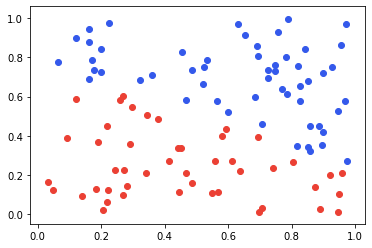

In [6]:
import matplotlib.pyplot as plt

def set_points_classes(points : numpy.ndarray) -> dict :
    points_dataset = {}
    for x in points :
        x_1 = x[0]
        x_2 = x[1]
        
        x_class = 1 if -0.5 * x_1 + 0.75 <= x_2 else -1;
        
        if x_class not in points_dataset :
            points_dataset[x_class] = [x]
        else:
            points_dataset[x_class].append(x)
    return points_dataset

distinct_points = set_points_classes(points)

def print_points(distinct_points : dict):
    for key, value in distinct_points.items() :
        p_color = "#eb4034" if key == -1 else "#3459eb"
        for v in value :
            plt.scatter(v[0], v[1],c = p_color)

    plt.show()
    
print_points(distinct_points)

3. We split the data into two datasets $D_{app}$ (training) and $D_{test}$ (testing) (80%, 20%).

In [7]:
def split_points(distinct_points : dict, ratio = 50) -> (dict, dict):
    """
    Split points in two dictionaries : D_app and D_test
    ratio is the percentage of data remaining in D_app.
    If ratio is 0, D_app is empty and D_test contains everything.
    If ratio is 100 D_app contains everything and D_test is empty.
    """
    
    assert 0 <= ratio <= 100, "ratio is not in [0;100]."
    
    D_app, D_test = {}, {}
    
    if ratio == 0 :
        D_test = distinct_points
        return D_app, D_test
    if ratio == 100 :
        D_app = distinct_points
        return D_app, D_test
    
    

    for key, value in distinct_points.items() :
        split_index = int(len(value) * ratio/100)
        D_app[key] = value[:split_index]
        D_test[key] = value[split_index:]
        
    return D_app, D_test

D_app, D_test = split_points(distinct_points,80)

4. We define a function **ptrain** with the input $D_{app}$ which generate  $\theta$ after convergence. $\theta$ is randomly initialized.

In [9]:
def sign(theta, xplus):
    return 1 if numpy.dot(theta.T, xplus) >= 0 else -1

def ptrain(D_app : dict) -> numpy.array :
    theta = numpy.random.random(len(D_app[1][0]) + 1)
    data_separated = False
    while not data_separated:
        data_separated = True
        for key, value in D_app.items():
            for v in value:
                xplus = numpy.append(v,1)
                if(sign(theta, xplus) != key):
                    theta = theta + key * xplus
                    data_separated = False
                    
    return theta

5. We overlap the dataset visualization with the equation  $x_2 = -\frac{w_1 x_1 + b}{w_2}$ with $w_1$, $w_2$ et $b$ after **ptrain**.

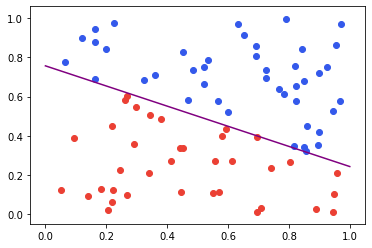

In [10]:
def print_points_with_theta(distinct_points : dict, theta : numpy.array):
    for key, value in distinct_points.items() :
        p_color = "#eb4034" if key == -1 else "#3459eb"
        for v in value :
            plt.scatter(v[0], v[1],c = p_color)
    
    points2 = numpy.array([0, 1])
    plt.plot(points2, [-((theta[0] * x + theta[2])/theta[1]) for x in points2], c="purple")


theta = ptrain(D_app)

print_points_with_theta(D_app, theta)

6. We define a function **ptest** accepting as inputs an example $\mathbf{x}$ and $\theta$ and returning as output a prediction according to $f_{\theta}(\mathbf{x})$ formula.

In [11]:
def ptest(sample_x, theta):
    xplus = numpy.append(sample_x,1)
    return sign(theta, xplus)

7. We predict the class of each test example and we compute the correct classification rate.

In [12]:
def compute_perceptron_classification(D_test, theta):
    total_classification = 0
    good_classification = 0
    for key, value in D_test.items():
        for v in value :
            c = ptest(v, theta)
            good_classification += 1 if c == key else 0
            total_classification += 1
    
    return good_classification/total_classification

print(compute_perceptron_classification(D_test, theta))

1.0


8. We repeat these steps increasing $d$ from 2 to 20 and we draw the correct classification rate according to $d$. Also for a better representation, we display an average for 100 executions.

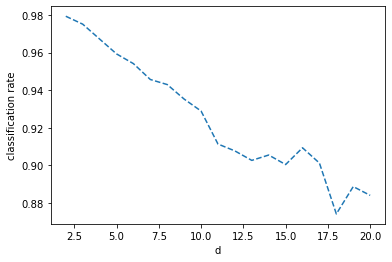

In [14]:
def plot_perceptron_dimension_rate():
    classification_rates = []
    
    for d in range(2, 21):
        average = 0
        
        for i in range(0, 100):
            points = draw_random_points(100,d)
            d_p = set_points_classes(points)
            d_a, d_t = split_points(d_p, 80)
            t = ptrain(d_a)
            classification_rate = compute_perceptron_classification(d_t, t)
            
            average += classification_rate
        average /= 100
        classification_rates.append(average)

    plt.plot(range(2,21), classification_rates,"--")
    plt.ylabel('classification rate')
    plt.xlabel('d')
    plt.show()
        
plot_perceptron_dimension_rate()

This curve shows the [Curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality), which means that increasing data dimensions tends to lower the correct classifcation rate.